In [1]:
batting <- read.csv('/kaggle/input/the-history-of-baseball/batting.csv')

In [2]:
head(batting)

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,⋯,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,abercda01,1871,1,TRO,,1,4,0,0,0,⋯,0,0,0,0,0,NA,NA,NA,NA,NA
2,addybo01,1871,1,RC1,,25,118,30,32,6,⋯,13,8,1,4,0,NA,NA,NA,NA,NA
3,allisar01,1871,1,CL1,,29,137,28,40,4,⋯,19,3,1,2,5,NA,NA,NA,NA,NA
4,allisdo01,1871,1,WS3,,27,133,28,44,10,⋯,27,1,1,0,2,NA,NA,NA,NA,NA
5,ansonca01,1871,1,RC1,,25,120,29,39,11,⋯,16,6,2,2,1,NA,NA,NA,NA,NA
6,armstbo01,1871,1,FW1,,12,49,9,11,2,⋯,5,0,1,0,1,NA,NA,NA,NA,NA


In [3]:
str(batting)

'data.frame':	101332 obs. of  22 variables:
 $ player_id: chr  "abercda01" "addybo01" "allisar01" "allisdo01" ...
 $ year     : int  1871 1871 1871 1871 1871 1871 1871 1871 1871 1871 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ team_id  : chr  "TRO" "RC1" "CL1" "WS3" ...
 $ league_id: chr  "" "" "" "" ...
 $ g        : int  1 25 29 27 25 12 1 31 1 18 ...
 $ ab       : num  4 118 137 133 120 49 4 157 5 86 ...
 $ r        : num  0 30 28 28 29 9 0 66 1 13 ...
 $ h        : num  0 32 40 44 39 11 1 63 1 13 ...
 $ double   : num  0 6 4 10 11 2 0 10 1 2 ...
 $ triple   : num  0 0 5 2 3 1 0 9 0 1 ...
 $ hr       : num  0 0 0 2 0 0 0 0 0 0 ...
 $ rbi      : num  0 13 19 27 16 5 2 34 1 11 ...
 $ sb       : num  0 8 3 1 6 0 0 11 0 1 ...
 $ cs       : num  0 1 1 1 2 1 0 6 0 0 ...
 $ bb       : num  0 4 2 0 2 0 1 13 0 0 ...
 $ so       : num  0 0 5 2 1 1 0 1 0 0 ...
 $ ibb      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ hbp      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ sh       : num  NA N

In [8]:
head(batting$ab)

[1]   4 118 137 133 120  49

In [9]:
head(batting$double)

[1]  0  6  4 10 11  2

# Feature Engineering

We need to add three more statistics that were used in Moneyball! These are:

1. Batting Average
2. On Base Percentage
3. Slugging Percentage

AVG=H/AB
 
Which means that the Batting Average is equal to H (Hits) divided by AB (At Base). So we'll do the following to create a new column called BA and add it to our data frame:

In [10]:
batting$BA <- batting$h / batting$ab

In [12]:
tail(batting$BA,5)

[1]       NaN 0.2680851 0.2844828 0.1742857       NaN

In [13]:
# On Base Percentage
batting$OBP <- (batting$h + batting$bb + batting$hbp)/(batting$ab + batting$bb + batting$hbp + batting$sf)

In [14]:
# Creating X1B (Singles)
batting$X1B <- batting$h - batting$double - batting$triple - batting$hr

In [15]:
# Creating Slugging Average (SLG)
batting$SLG <- ((1 * batting$X1B) + (2 * batting$double) + (3 * batting$triple) + (4 * batting$hr) ) / batting$ab

In [16]:
str(batting)

'data.frame':	101332 obs. of  26 variables:
 $ player_id: chr  "abercda01" "addybo01" "allisar01" "allisdo01" ...
 $ year     : int  1871 1871 1871 1871 1871 1871 1871 1871 1871 1871 ...
 $ stint    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ team_id  : chr  "TRO" "RC1" "CL1" "WS3" ...
 $ league_id: chr  "" "" "" "" ...
 $ g        : int  1 25 29 27 25 12 1 31 1 18 ...
 $ ab       : num  4 118 137 133 120 49 4 157 5 86 ...
 $ r        : num  0 30 28 28 29 9 0 66 1 13 ...
 $ h        : num  0 32 40 44 39 11 1 63 1 13 ...
 $ double   : num  0 6 4 10 11 2 0 10 1 2 ...
 $ triple   : num  0 0 5 2 3 1 0 9 0 1 ...
 $ hr       : num  0 0 0 2 0 0 0 0 0 0 ...
 $ rbi      : num  0 13 19 27 16 5 2 34 1 11 ...
 $ sb       : num  0 8 3 1 6 0 0 11 0 1 ...
 $ cs       : num  0 1 1 1 2 1 0 6 0 0 ...
 $ bb       : num  0 4 2 0 2 0 1 13 0 0 ...
 $ so       : num  0 0 5 2 1 1 0 1 0 0 ...
 $ ibb      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ hbp      : num  NA NA NA NA NA NA NA NA NA NA ...
 $ sh       : num  NA N

# Merging Salary Data with Batting Data

In [17]:
sal <- read.csv('/kaggle/input/the-history-of-baseball/salary.csv')

In [18]:
summary(batting)

  player_id              year          stint         team_id         
 Length:101332      Min.   :1871   Min.   :1.000   Length:101332     
 Class :character   1st Qu.:1933   1st Qu.:1.000   Class :character  
 Mode  :character   Median :1972   Median :1.000   Mode  :character  
                    Mean   :1964   Mean   :1.078                     
                    3rd Qu.:1997   3rd Qu.:1.000                     
                    Max.   :2015   Max.   :5.000                     
                                                                     
  league_id               g                ab             r         
 Length:101332      Min.   :  0.00   Min.   :  0    Min.   :  0.00  
 Class :character   1st Qu.: 13.00   1st Qu.:  7    1st Qu.:  0.00  
 Mode  :character   Median : 34.00   Median : 57    Median :  5.00  
                    Mean   : 51.40   Mean   :150    Mean   : 19.89  
                    3rd Qu.: 80.25   3rd Qu.:251    3rd Qu.: 30.00  
                    Max.  

In [20]:
batting <- subset(batting,year >= 1985)

In [21]:
summary(batting)

  player_id              year          stint         team_id         
 Length:39095       Min.   :1985   Min.   :1.000   Length:39095      
 Class :character   1st Qu.:1994   1st Qu.:1.000   Class :character  
 Mode  :character   Median :2001   Median :1.000   Mode  :character  
                    Mean   :2001   Mean   :1.081                     
                    3rd Qu.:2009   3rd Qu.:1.000                     
                    Max.   :2015   Max.   :4.000                     
                                                                     
  league_id               g                ab              r         
 Length:39095       Min.   :  0.00   Min.   :  0.0   Min.   :  0.00  
 Class :character   1st Qu.: 14.00   1st Qu.:  1.0   1st Qu.:  0.00  
 Mode  :character   Median : 34.00   Median : 35.0   Median :  3.00  
                    Mean   : 51.03   Mean   :134.9   Mean   : 18.02  
                    3rd Qu.: 76.00   3rd Qu.:217.0   3rd Qu.: 26.00  
                    

In [22]:
combo <- merge(batting,sal,by=c('player_id','year'))

In [23]:
summary(combo)

  player_id              year          stint      team_id.x        
 Length:27385       Min.   :1985   Min.   :1.0   Length:27385      
 Class :character   1st Qu.:1993   1st Qu.:1.0   Class :character  
 Mode  :character   Median :2000   Median :1.0   Mode  :character  
                    Mean   :2000   Mean   :1.1                     
                    3rd Qu.:2008   3rd Qu.:1.0                     
                    Max.   :2015   Max.   :4.0                     
                                                                   
 league_id.x              g                ab              r         
 Length:27385       Min.   :  1.00   Min.   :  0.0   Min.   :  0.00  
 Class :character   1st Qu.: 26.00   1st Qu.:  3.0   1st Qu.:  0.00  
 Mode  :character   Median : 50.00   Median : 73.5   Median :  7.00  
                    Mean   : 63.94   Mean   :175.7   Mean   : 23.66  
                    3rd Qu.:100.00   3rd Qu.:325.0   3rd Qu.: 41.00  
                    Max.   :163.00  

# Analyzing the Lost Players

**As previously mentioned, the Oakland A's lost 3 key players during the off-season. We'll want to get their stats to see what we have to replace. The players lost were: first baseman 2000 AL MVP Jason Giambi (giambja01) to the New York Yankees, outfielder Johnny Damon (damonjo01) to the Boston Red Sox and infielder Rainer Gustavo "Ray" Olmedo ('saenzol01').**

In [24]:
lost_players <- subset(combo,player_id %in% c('giambja01','damonjo01','saenzol01') )

In [25]:
lost_players

,player_id,year,stint,team_id.x,league_id.x,g,ab,r,h,double,⋯,sh,sf,g_idp,BA,OBP,X1B,SLG,team_id.y,league_id.y,salary
,<chr>,<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>
5546,damonjo01,1995,1,KCA,AL,47,188,32,53,11,⋯,2,3,2,0.2819149,0.3235294,34,0.4414894,KCA,AL,109000
5547,damonjo01,1996,1,KCA,AL,145,517,61,140,22,⋯,10,5,4,0.2707930,0.3129496,107,0.3675048,KCA,AL,180000
5548,damonjo01,1997,1,KCA,AL,146,472,70,130,12,⋯,6,1,3,0.2754237,0.3378378,102,0.3855932,KCA,AL,240000
5549,damonjo01,1998,1,KCA,AL,161,642,104,178,30,⋯,3,3,4,0.2772586,0.3394625,120,0.4392523,KCA,AL,460000
5550,damonjo01,1999,1,KCA,AL,145,583,101,179,39,⋯,3,4,13,0.3070326,0.3789954,117,0.4768439,KCA,AL,2100000
5551,damonjo01,2000,1,KCA,AL,159,655,136,214,42,⋯,8,12,7,0.3267176,0.3819918,146,0.4946565,KCA,AL,4000000
5552,damonjo01,2001,1,OAK,AL,155,644,108,165,34,⋯,5,4,7,0.2562112,0.3235294,118,0.3633540,OAK,AL,7100000
5553,damonjo01,2002,1,BOS,AL,154,623,118,178,34,⋯,3,5,4,0.2857143,0.3562232,119,0.4430177,BOS,AL,7250000
5554,damonjo01,2003,1,BOS,AL,145,608,103,166,32,⋯,6,6,5,0.2730263,0.3450292,116,0.4046053,BOS,AL,7500000


**Since all these players were lost in after 2001 in the offseason, let's only concern ourselves with the data from 2001.**

In [26]:
lost_players <- subset(lost_players,year == 2001)

In [28]:
lost_players <- lost_players[,c('player_id','h','double','triple','hr','OBP','SLG','BA','ab')]

In [29]:
head(lost_players)

,player_id,h,double,triple,hr,OBP,SLG,BA,ab
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5552,damonjo01,165,34,4,9,0.3235294,0.3633540,0.2562112,644
8520,giambja01,178,47,2,38,0.4769001,0.6596154,0.3423077,520
21714,saenzol01,67,21,1,9,0.2911765,0.3836066,0.2196721,305


# Replacement Players

****Now we have all the information we need! Here is your final task - Find Replacement Players for the key three players we lost! However, you have three constraints:**

**The total combined salary of the three players can not exceed 15 million dollars.
Their combined number of At Bats (AB) needs to be equal to or greater than the lost players.
Their mean OBP had to equal to or greater than the mean OBP of the lost players****

In [30]:
library(dplyr)
avail.players <- filter(combo,year==2001)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Warning message:
“Removed 168 rows containing missing values (`geom_point()`).”


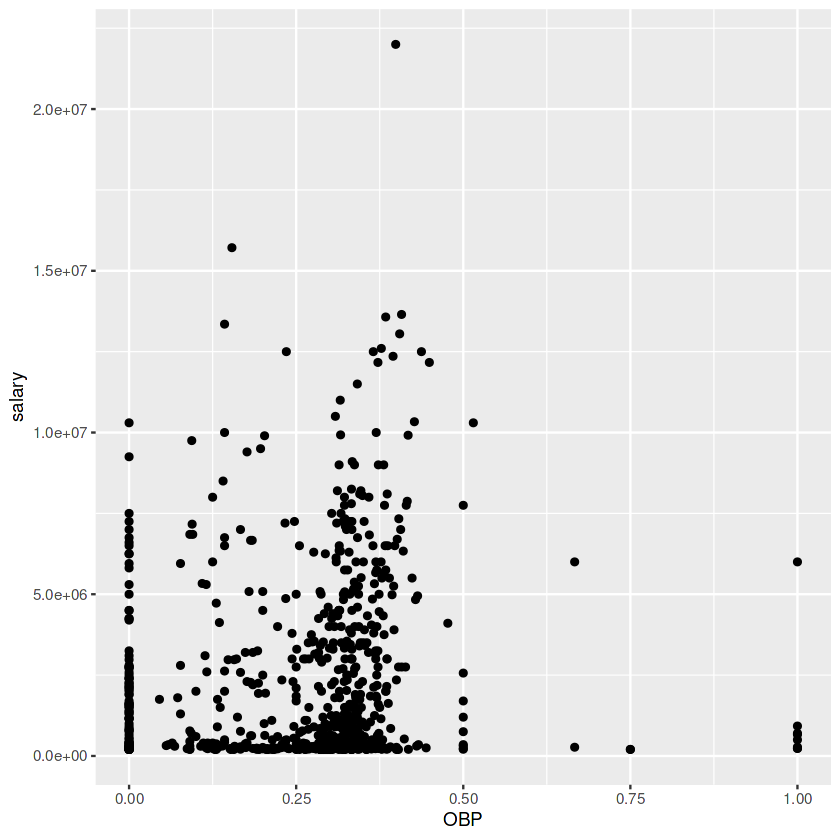

In [31]:
library(ggplot2)
ggplot(avail.players,aes(x=OBP,y=salary)) + geom_point()

In [32]:
avail.players <- filter(avail.players,salary<8000000,OBP>0)

In [33]:
avail.players <- filter(avail.players,ab >= 500)

In [34]:
possible <- head(arrange(avail.players,desc(OBP)),10)

In [35]:
possible <- possible[,c('player_id','OBP','ab','salary')]

In [36]:
possible

,player_id,OBP,ab,salary
,<chr>,<dbl>,<dbl>,<int>
1,giambja01,0.4769001,520,4103333
2,heltoto01,0.4316547,587,4950000
3,berkmla01,0.4302326,577,305000
4,gonzalu01,0.4285714,609,4833333
5,thomeji01,0.4161491,526,7875000
6,alomaro01,0.4146707,575,7750000
7,edmonji01,0.4102142,500,6333333
8,gilesbr02,0.4035608,576,7333333
9,pujolal01,0.4029630,590,200000


**Can't choose giambja again, but the other ones look good (2-4). I choose them!**

In [37]:
possible[2:4,]

,player_id,OBP,ab,salary
,<chr>,<dbl>,<dbl>,<int>
2,heltoto01,0.4316547,587,4950000
3,berkmla01,0.4302326,577,305000
4,gonzalu01,0.4285714,609,4833333
